## Initial setup

In [10]:
!pip3 install -r requirements.txt --quiet

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import sys
print(sys.path)

['/Users/christophe/Repositories/rogue-shippers', '/Users/christophe/.pyenv/versions/3.7.6/lib/python37.zip', '/Users/christophe/.pyenv/versions/3.7.6/lib/python3.7', '/Users/christophe/.pyenv/versions/3.7.6/lib/python3.7/lib-dynload', '', '/Users/christophe/.pyenv/versions/rs-venv/lib/python3.7/site-packages', '/Users/christophe/.pyenv/versions/rs-venv/lib/python3.7/site-packages/IPython/extensions', '/Users/christophe/.ipython']


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, HoverTool, DatetimeTickFormatter, Range1d
from bokeh.io import output_notebook
from bokeh.transform import dodge, factor_cmap


import sys
import os
import re
import csv
import xlrd
import time    
import math
import random
import pickle
import json
from datetime import datetime, timedelta
from pytz import timezone

import joblib
import spacy

In [2]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.0f}'.format
output_notebook()

%matplotlib inline
os.environ['TZ'] = 'UTC+0'
time.tzset()

Loading BokehJS ...

In [5]:
from os import listdir, getcwd
from os.path import isfile, isdir, join

data = pd.DataFrame()

repo = getcwd()
data_path = f'{repo}/data/2019 Exports + Imports'
countries = [f for f in listdir(data_path) if isdir(join(data_path, f))]

## Compile data 

In [ ]:
sheets_dict = pd.read_excel(file, sheet_name=None)

In [4]:
rows = 0
def print_rows(file, country=None, ie=None):
    r = 0
    data = pd.DataFrame()
    sheets_dict = pd.read_excel(file, sheet_name=None)
    for name, sheet in sheets_dict.items():
        if ie:
            print(ie)
            c = max(sheet.count())
            print(c)
            r += c
        elif name != 'Sheet1':
            print(name)
            c = max(sheet.count())
            print(c)
            r += c
        else:
            print('In else *********************')
            c = max(sheet.count())
            print(c)
            r += c
    return r

def ingest_excel(file, country=None, ie=None):
    this_data = pd.DataFrame()
    sheets_dict = pd.read_excel(file, sheet_name=None, header=0, parse_dates=['Sailing DT'],
                                names = [
                                    'Booking No',
                                    'B/L No',
                                    'Shipper',
                                    'Shipper Address',
                                    'Consignee',
                                    'Consignee Address',
                                    'TEU',
                                    'FEU',
                                    'Trunk VVD',
                                    'Vessel Name',
                                    'POR',
                                    'POL(Booking)',
                                    'POD(Booking)',
                                    'DEL',
                                    'WGT(KGS)',
                                    'MEA(CBM)',
                                    'PKG',
                                    'PKG Unit',
                                    'REP CMDT',
                                    'CMDT Code',
                                    'CMDT',
                                    'Customs Description',
                                    'Freight Term',
                                    'Forward Name',
                                    'Notify Name',
                                    'Notify Address',
                                    'Also Notify Name',
                                    'Export Name',
                                    'Trunk POL',
                                    'Trunk POD',
                                    'Booking Contact Phone Number',
                                    'Booking Contact E-Mail',
                                    'SI Contact Phone Number',
                                    'SI Contact E-Mail',
                                    'Sailing DT',
                                    'REV.WEEK',
                                    'Activity Teu',
                                    'Activity Feu',
                                    'Mty P/up CY'
                                ], dtype = {
                                     'Booking No': 'object',
                                     'B/L No': 'object',
                                     'Shipper': 'object',
                                     'Shipper Address': 'object',
                                     'Consignee': 'object',
                                     'Consignee Address': 'object',
                                     'TEU': np.float16,
                                     'FEU': np.float16,
                                     'Trunk VVD': 'object',
                                     'Vessel Name': 'object',
                                     'POR': 'object',
                                     'POL(Booking)': 'object',
                                     'POD(Booking)': 'object',
                                     'DEL': 'object',
                                     'WGT(KGS)': np.float32,
                                     'MEA(CBM)': np.float32,
                                     'PKG': np.float32,
                                     'PKG Unit': 'object',
                                     'REP CMDT': np.float16,
                                     'CMDT Code': np.float32,
                                     'CMDT': 'object',
                                     'Customs Description': 'object',
                                     'Freight Term': 'object',
                                     'Forward Name': 'object',
                                     'Notify Name': 'object',
                                     'Notify Address': 'object',
                                     'Also Notify Name': 'object',
                                     'Export Name': 'object',
                                     'Trunk POL': 'object',
                                     'Trunk POD': 'object',
                                     'Booking Contact Phone Number': 'object',
                                     'Booking Contact E-Mail': 'object',
                                     'SI Contact Phone Number': 'object',
                                     'SI Contact E-Mail': 'object',
                                     'Sailing DT': 'object',
                                     'REV.WEEK': np.float16,
                                     'Activity Teu': np.float16,
                                     'Activity Feu': np.float16,
                                     'Mty P/up CY': 'object'
                                })
    for name, sheet in sheets_dict.items():
        if ie:
            print(ie)
            sheet['Imports_Exports'] = ie[0:3].lower()
        elif name != 'Sheet1':
            print(name)
            sheet['Imports_Exports'] = name[0:3].lower()
        else:
            print('In else *********************')
            sheet['Imports_Exports'] = ""
        sheet['country'] = country
        this_data = this_data.append(sheet)
    return this_data

for country in countries:
    print(f'\nCountry: {country}')
    files = [f for f in listdir(join(data_path, country)) if isfile(join(data_path, country, f))]
    dirs = [f for f in listdir(join(data_path, country)) if isdir(join(data_path, country, f))]
    
    if dirs:
        for d in dirs:
            print(f'Folder: {d}')
            files = [f for f in listdir(join(data_path, country, d)) if isfile(join(data_path, country, d, f))]
            for f in files:
                if str(f)[0] == '~':
                    # Backup for open Excel
                    continue
                print(f'File: {f}')
#                 rows += print_rows(join(data_path, country, d, f), ie=d)
                new_data = ingest_excel(join(data_path, country, d, f), country, d)
                data = data.append(new_data, ignore_index=True)
        
    else:
        for f in files:
            if str(f)[0] == '~':
                # Backup for open Excel
                continue
            print(f'File: {f}')
#             rows += print_rows(join(data_path, country, f))
            new_data = ingest_excel(join(data_path, country, f), country)
            data = data.append(new_data, ignore_index=True)
    
    data.reset_index(inplace=True, drop=True)
    
data.to_csv(join(data_path, 'data.csv'))

# print(f"Total rows: {rows}")


Country: USA
Folder: Export
File: Book1.xlsx
Export
Folder: Import
File: Book1.xlsx
Import

Country: Norway
File: Book1.xlsx
Exports
Imports

Country: Ghana
File: Book1.xlsx
Exports
Imports

Country: France
File: Book1.xlsx
Exports
Imports

Country: Korea
Folder: Export
File: Book1.xlsx
Export
Folder: Import
File: Book1.xlsx
Import

Country: Belgium
File: Book1.xlsx
Exports
Imports

Country: Kuwait
File: Book1.xlsx
Imports

Country: Turkey
File: Book1.xlsx
Exports
Imports

Country: Malaysia
File: Book1.xlsx
Exports
Imports

Country: Indonesia
File: Book1.xlsx
Exports
Imports

Country: Iraq
File: Book1.xlsx
Imports

Country: Spain
File: Book1.xlsx
Exports
Imports

Country: Australia
File: Book1.xlsx
Exports
Imports

Country: Qatar
File: Book1.xlsx
Imports

Country: Germany
File: Book1.xlsx
Exports
Imports

Country: Bahrain
File: Book1.xlsx
Imports

Country: Taiwan
File: Book1.xlsx
Exports
Imports

Country: Oman
File: Book1.xlsx
Imports

Country: Algeria
File: Book1.xlsx
Imports

Countr

In [8]:
data['Shipper'] = data['Shipper'].astype('category')
data['Shipper Address'] = data['Shipper Address'].astype('category')
data['Consignee'] = data['Consignee'].astype('category')
data['Consignee Address'] = data['Consignee Address'].astype('category')
data['Trunk VVD'] = data['Trunk VVD'].astype('category')
data['Vessel Name'] = data['Vessel Name'].astype('category')
data['POR'] = data['POR'].astype('category')
data['POL(Booking)'] = data['POL(Booking)'].astype('category')
data['POD(Booking)'] = data['POD(Booking)'].astype('category')
data['DEL'] = data['DEL'].astype('category')
data['PKG Unit'] = data['PKG Unit'].astype('category')
data['CMDT'] = data['CMDT'].astype('category')
data['Customs Description'] = data['Customs Description'].astype('category')
data['Freight Term'] = data['Freight Term'].astype('category')
data['Forward Name'] = data['Forward Name'].astype('category')
data['Notify Name'] = data['Notify Name'].astype('category')
data['Notify Address'] = data['Notify Address'].astype('category')
data['Also Notify Name'] = data['Also Notify Name'].astype('category')
data['Export Name'] = data['Export Name'].astype('category')
data['Trunk POL'] = data['Trunk POL'].astype('category')
data['Trunk POD'] = data['Trunk POD'].astype('category')
data['Booking Contact Phone Number'] = data['Booking Contact Phone Number'].astype('category')
data['Booking Contact E-Mail'] = data['Booking Contact E-Mail'].astype('category')
data['SI Contact Phone Number'] = data['SI Contact Phone Number'].astype('category')
data['SI Contact E-Mail'] = data['SI Contact E-Mail'].astype('category')
data['Mty P/up CY'] = data['Mty P/up CY'].astype('category')
data['Imports_Exports'] = data['Imports_Exports'].astype('category')
data['country'] = data['country'].astype('category')

In [5]:
data.shape

(5546399, 41)

In [41]:
data.memory_usage()

Index                                128
Booking No                      44371192
B/L No                          44371192
Shipper                         35091556
Shipper Address                 47958844
Consignee                       35827644
Consignee Address               48873244
TEU                             11092798
FEU                             11092798
Trunk VVD                       25441404
Vessel Name                     11285014
POR                             11286814
POL(Booking)                    11105878
POD(Booking)                    11106134
DEL                             11290350
WGT(KGS)                        22185596
MEA(CBM)                        22185596
PKG                             22185596
PKG Unit                         5552343
REP CMDT                        11092798
CMDT Code                       22185596
CMDT                            11301174
Customs Description             49134964
Freight Term                     5546495
Forward Name    

In [82]:
data.head(100).to_csv(join(data_path, 'head.csv'))

In [47]:
denom = len(data)/100

for col in data.columns:
    print(f"{col:30s} Unique: {data[col].nunique()/denom:.1f}% \t Empties: {pd.isna(data[col].values).sum()/denom if data[col].dtype.name in ('category','object') else 0:.1f}%")

Booking No                     Unique: 43.4% 	 Empties: 0.0%
B/L No                         Unique: 48.8% 	 Empties: 0.0%
Shipper                        Unique: 5.5% 	 Empties: 0.0%
Shipper Address                Unique: 10.8% 	 Empties: 0.2%
Consignee                      Unique: 7.1% 	 Empties: 0.0%
Consignee Address              Unique: 12.9% 	 Empties: 6.2%
TEU                            Unique: 0.0% 	 Empties: 0.0%
FEU                            Unique: 0.0% 	 Empties: 0.0%
Trunk VVD                      Unique: 1.4% 	 Empties: 0.0%
Vessel Name                    Unique: 0.1% 	 Empties: 0.0%
POR                            Unique: 0.1% 	 Empties: 0.0%
POL(Booking)                   Unique: 0.0% 	 Empties: 0.0%
POD(Booking)                   Unique: 0.0% 	 Empties: 0.0%
DEL                            Unique: 0.1% 	 Empties: 0.0%
WGT(KGS)                       Unique: 17.9% 	 Empties: 0.0%
MEA(CBM)                       Unique: 3.8% 	 Empties: 0.0%
PKG                            Uniq

In [161]:
data['Shipper'].nunique()

302525

In [103]:
pd.isna(full_data['Forward Name'].values).sum()

4670883

In [89]:
for col in full_data.columns:
    print(f"{col} - Mode: {full_data[col].mode()}")

 Booking No  - Mode: 0    SEL919191900
dtype: object
 B/L No  - Mode: 0    SEL919191900W
dtype: object
 Shipper  - Mode: 0    SAMSUNG ELECTRONICS CO., LTD 129, SAMSUNG-RO, ...
dtype: object
 Shipper Address  - Mode: 0    .
dtype: object
 Consignee  - Mode: 0    TO ORDER
dtype: object
 Consignee Address  - Mode: 0    SAN FRANCISCO, CA 94105, USA\nTEL: 415-427-642...
dtype: object
 TEU  - Mode: 0   0
dtype: float64
 FEU  - Mode: 0   1
dtype: float64
 Trunk VVD  - Mode: 0    YJUKF121E
dtype: object
 Vessel Name - Mode: 0    HYUNDAI ALGECIRAS
dtype: object
 POR  - Mode: 0    KRPUS
dtype: object
 POL(Booking)  - Mode: 0    KRPUS
dtype: object
 POD(Booking)  - Mode: 0    USLGB
dtype: object
 DEL  - Mode: 0    USLGB
dtype: object
 WGT(KGS)  - Mode: 0   0
dtype: float64
 MEA(CBM)  - Mode: 0   0
dtype: float64
 PKG  - Mode: 0    1
dtype: int64
 PKG Unit - Mode: 0    CT
dtype: object
 REP CMDT - Mode: 0   9901
dtype: float64
 CMDT Code - Mode: 0   990003
dtype: float64
 CMDT - Mode: 0    GDSM, N

## Data output

In [103]:
joblib.dump(data, join(f'{repo}', 'pickled_data.pkl'))
joblib.dump(data.sample(20000), join(f'{repo}/app/data', 'pickled_data_sample.pkl'))

['/Users/christophe/Repositories/rogue-shippers/app/data/pickled_data_sample.pkl']

In [6]:
data = joblib.load(join(f'{repo}/app/data', 'pickled_data.pkl'))

## EDA

In [26]:
# Count of shipments by shipper
data.groupby(['Shipper']).size().sort_values(0, ascending=False)[0:100]

Shipper
SAMSUNG ELECTRONICS CO., LTD 129, SAMSUNG-RO, YEONGTONG-GU                43863
APL LOGISTICS VIETNAM COMPANY LTD., 17 BA HUYEN THANH QUAN STREET,        21867
YUSEN LOGISTICS (VIETNAM) CO., LTD.  - OCM                                17895
HYUNDAI SHIPPING CO., LTD                                                 13629
ORIENT EXPRESS CONTAINER COMPANY LIMITED.                                 13569
APL LOGISTICS C/O APL-NOL VIETNAM LIMITED                                 11821
PANTOS LOGISTICS CO.,LTD. O/B OF LG ELECTRONICS INC                       11178
OEC LOGISTICS (QINGDAO) CO., LTD. SHENZHEN BRANCH                          9854
SUZHOU SAMSUNG ELECTRONICS CO.,LTD. NO.501 SUHONG EAST ROAD                9764
KUBOTA CORPORATION                                                         9527
NIPPON EXPRESS CO.,LTD.                                                    9021
SHANGHAI HUAYANG INTERNATIONAL  LOGISTICS CO.,LTD                          8533
NISSIN CORPORATION              

In [29]:
data.groupby(['Shipper']).size().sort_values(0, ascending=True)[0:100]

Shipper
FUJIAN RONGJIANG IMP.& EXP.CO.,LTD 28/F.,FORTUNE                          1
SINO EMPREMIER PAPER SOLUTION, INC. ON BEHALF OF                          1
SINO EMPREMIER PAPER SOLUTION INC  ON BEHALF OF DUKE SYSTEM LOGISTIC      1
SINO EAST STEEL GROUP CO LTD.                                             1
FLYING WHEEL TRADING L.L.C                                                1
SINO DASUN GROUP CO., LIMITIED                                            1
FLYJAC LOGISTICS PVT. LTD                                                 1
FLYWORLD GROUP CO. LTD                                                    1
SINO CHINA ASIA INVESTMENT LIMITED                                        1
SINO BRILLIANT LTD. DONG SHENG ROAD, DONG GANG                            1
SINO AGRO-CHEMICAL INDUSTRY LTD. UNIT G, 26/F SEIBU BLDG,3002#            1
FM GLOBAL LOGISTICS PTY LTD 32  FORSYTH STREET                            1
SINO - THAI STARCH CO.,LTD                                                1
SINN

<AxesSubplot:ylabel='Frequency'>

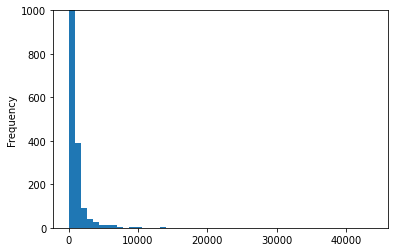

In [52]:
data.groupby(['Shipper']).size().plot.hist(ylim=(0,1000), bins=50) 
# Leftmost bar has 300k values

In [56]:
grouped = data.groupby(['Shipper']).size().reset_index(name='Count by Shipper Name')
grouped.groupby('Count by Shipper Name').size()[0:10].reset_index(name='Number of Shippers')

,Count by Shipper Name,Number of Shippers
0,1,40981
1,2,76044
2,3,36716
3,4,33147
4,5,13948
5,6,15388
6,7,7097
7,8,8723
8,9,5404
9,10,5216


In [76]:
# Common endings of shipper names to determine company v. person
data['Shipper suffix'] = data.Shipper.str.extract(r'([a-zA-Z0-9.]*)[,\-_()#*\"\'\s]*$')

In [77]:
data[['Shipper', 'Shipper suffix']][0:50]

,Shipper,Shipper suffix
0,"DUNAVANT LOGISTICS GROUP, LLC",LLC
1,EASTMAN CHEMICAL COMPANY,COMPANY
2,BURGESS PIGMENT P.O. BOX 349 525,525
3,BURGESS PIGMENT P.O. BOX 349 525,525
4,GP CELLULOSE ASIA MARKETING (HK) LTD.,LTD.
5,SABIC INNOVATIVE PLASTICS US LLC,LLC
6,SABIC INNOVATIVE PLASTICS US LLC,LLC
7,SABIC INNOVATIVE PLASTICS US LLC,LLC
8,SABIC INNOVATIVE PLASTICS US LLC,LLC
9,SABIC INNOVATIVE PLASTICS US LLC,LLC


In [131]:
print(re.findall(fr"^[\W|_]*(.*?)[\W|_]*(?=LTD|CO)[\W|_]*", "SAMSUNG ELECTRONICS CO., LTD 129, SAMSUNG-RO, YEONGTONG-GU"))

['SAMSUNG ELECTRONICS']


In [154]:
print(co_sfx_regex)

^[\W|_]*(.*?)[\W|_]*(?=LTD|LIMITED|CORP|CORPORATION|INC|BHD|COMPANY|LLC|L.L.C|S.A|SA|GMBH|SPA|S.P.A|CO|AS|A.S|SRL|S.R.L|SL|S.L|NV|KG|CV)[\W|_]*


In [79]:
print(re.findall(co_sfx_regex,"'(AS THE CONSIGNOR.) CHEMPLAS CORPORATION'"))

['AS THE CONSIGNOR.) CHEMPLAS']


In [9]:
print(re.findall(sfx_regex,"'(AS THE CONSIGNOR.) CHEMPLAS CORPORATION'"))

['CORPORATION']


In [67]:
print(re.findall(sfx_regex,"AIR SEA TRANSPORT (CHICAGO), INC."))

['INC']


In [78]:
company_suffixes = [
    'LTD', 
    'LIMITED',
    'CORP',
    'CORPORATION',
    'INC',
    'BHD',
    'SDN BHD',
    'SDN. BHD',
    'COMPANY',
    'LLC',
    'L.L.C',
    'S.A',
    'SA',
    'GMBH',
    'SPA',
    'S.P.A',
    'CO',
    'AS',
    'A.S',
    'SRL',
    'S.R.L',
    'SL',
    'S.L',
    'NV',
    'KG',
    'CV',
    'AG',
]


co_sfx_regex = fr"^[\W|_]*(.*?)(?:$|(?:[\W|_]+(?:{'|'.join(map(re.escape,company_suffixes))})(?:\W|_|$)))"
sfx_regex = fr"^[\W|_]*(?:.*?)[\W|_]+({'|'.join(map(re.escape,company_suffixes))})[\W|_]+"

In [68]:
print(co_sfx_regex)

^[\W|_]*(.*?)[\W|_]+(?:LTD|LIMITED|CORP|CORPORATION|INC|BHD|SDN\ BHD|SDN\.\ BHD|COMPANY|LLC|L\.L\.C|S\.A|SA|GMBH|SPA|S\.P\.A|CO|AS|A\.S|SRL|S\.R\.L|SL|S\.L|NV|KG|CV|AG)(?:\W|_|$)


In [55]:
paren_regex = r"(.+?)(?:\s*\(+.*)?$"
print(re.findall(paren_regex,"SAMSUNG ELECTRONICS"))

['SAMSUNG ELECTRONICS']


In [81]:
data['Shipper short name'] = data.Shipper.str.extract(co_sfx_regex)

In [82]:
data['Shipper suffix'] = data.Shipper.str.extract(sfx_regex)

In [83]:
data['Shipper short name no branch'] = data['Shipper short name'].str.extract(paren_regex)

In [84]:
data['Shipper short name'].nunique()

164214

In [85]:
data['Shipper short name no branch'].nunique()

157036

In [86]:
data['Shipper short name'] = data['Shipper short name'].astype('category')
data['Shipper suffix'] = data['Shipper suffix'].astype('category')
data['Shipper short name no branch'] = data['Shipper short name no branch'].astype('category')

In [99]:
col_names = list(data.columns)
idx = col_names.index('Shipper')
new_col_names = col_names[:idx+1] + ['Shipper short name', 'Shipper suffix', 'Shipper short name no branch'] + col_names[idx+1:-3]
new_col_names

['Booking No',
 'B/L No',
 'Shipper',
 'Shipper short name',
 'Shipper suffix',
 'Shipper short name no branch',
 'Shipper Address',
 'Consignee',
 'Consignee Address',
 'TEU',
 'FEU',
 'Trunk VVD',
 'Vessel Name',
 'POR',
 'POL(Booking)',
 'POD(Booking)',
 'DEL',
 'WGT(KGS)',
 'MEA(CBM)',
 'PKG',
 'PKG Unit',
 'REP CMDT',
 'CMDT Code',
 'CMDT',
 'Customs Description',
 'Freight Term',
 'Forward Name',
 'Notify Name',
 'Notify Address',
 'Also Notify Name',
 'Export Name',
 'Trunk POL',
 'Trunk POD',
 'Booking Contact Phone Number',
 'Booking Contact E-Mail',
 'SI Contact Phone Number',
 'SI Contact E-Mail',
 'Sailing DT',
 'REV.WEEK',
 'Activity Teu',
 'Activity Feu',
 'Mty P/up CY',
 'Imports_Exports',
 'country']

In [100]:
data = data.reindex(columns=new_col_names)

In [101]:
data[data['Shipper short name no branch'] == 'KUEHNE+NAGEL O/B OF:GLOBAL FURNITURE']

,Booking No,B/L No,Shipper,Shipper short name,Shipper suffix,Shipper short name no branch,Shipper Address,Consignee,Consignee Address,TEU,FEU,Trunk VVD,Vessel Name,POR,POL(Booking),POD(Booking),DEL,WGT(KGS),MEA(CBM),PKG,PKG Unit,REP CMDT,CMDT Code,CMDT,Customs Description,Freight Term,Forward Name,Notify Name,Notify Address,Also Notify Name,Export Name,Trunk POL,Trunk POD,Booking Contact Phone Number,Booking Contact E-Mail,SI Contact Phone Number,SI Contact E-Mail,Sailing DT,REV.WEEK,Activity Teu,Activity Feu,Mty P/up CY,Imports_Exports,country
452263,SHSM98945100,SHSM98945100W,"KUEHNE+NAGEL O/B OF:GLOBAL FURNITURE(ZHEJIANG)CO.,LTD",KUEHNE+NAGEL O/B OF:GLOBAL FURNITURE(ZHEJIANG,CO,KUEHNE+NAGEL O/B OF:GLOBAL FURNITURE,"WEST JIER ROAD,DIPU ANJI ZHEJIANG\nT:572-5239528 F:572-5666103",OFFICEMAX INCORPORATED 6600 NORTH MILITARY TRAIL,"BOCA RATON,FL 33496 UNITED STATES\nTEL:561-428-7374",0,2,YEMI1254E,EVER LISSOME,CNSHA,CNSHA,USLGB,USLCY,15960,152,1040,CT,9400,940438,"OFFICE EQUIPMENT, NOS;",OFFICE CHAIR,C,"ORIENT INTERNATIONAL LOGISTICS （HO\nLDING） CO.,LTD.","KUEHNE+NAGEL,INC\n921 BETHEL RD BUILDING 100 SUITE",101 COPPELL.TX 75019 UNITED STATES\nCONTACT:BEN SPITLER\nPHONE:972-471-1324,NaN,KUEHNE & NAGEL LIMITED SHANGHAI BRA\nNCH,SHASC,ATLSC,NaN,NaN,NaN,NaN,2019-04-24 18:15:00,17,0,2,CNSHAHJ,imp,USA


In [80]:
#
# TODO: Come back to 'O/B OF' to handle freight forwarders
#

In [ ]:
#
# TODO: Strip out prefixes like "As the consignor" or 'O/B OF:'
#

In [90]:
data[data['Shipper short name'] == '']

,Booking No,B/L No,Shipper,Shipper Address,Consignee,Consignee Address,TEU,FEU,Trunk VVD,Vessel Name,POR,POL(Booking),POD(Booking),DEL,WGT(KGS),MEA(CBM),PKG,PKG Unit,REP CMDT,CMDT Code,CMDT,Customs Description,Freight Term,Forward Name,Notify Name,Notify Address,Also Notify Name,Export Name,Trunk POL,Trunk POD,Booking Contact Phone Number,Booking Contact E-Mail,SI Contact Phone Number,SI Contact E-Mail,Sailing DT,REV.WEEK,Activity Teu,Activity Feu,Mty P/up CY,Imports_Exports,country,Shipper suffix,Shipper short name,Shipper short name no branch
986521,SEL909129100,SEL909129100,/.,"EVERLITE KOREA CO.LTD\nO-2302,109, MAPO-DAERO,MAPO-GU\nSEOUL KOREA (POST CODE:121-916)",TO THE ORDER,OF BANK AUDI FRANCE - 73\nAVENUE DES CHAMPS ELYSEES 75008\nPARIS / FRANCE,4,0,NNAGF179W,HYUNDAI SHENZHEN,KRPUS,KRPUS,IQUQR,IQUQR,86080,100,320,DR,3800,380053,"CHEMICALS, HAZARDOUS, NOS:",TOLUENE DIISOCYANATE,P,"CJ KOREA EXPRESS CORPORATION\nSEJONG-DAERO 9-GIL,JUNG-GU,SEOUL","GULF EYES, AL KARADA AL SHARQIA",",HAY BABIL, AREA 931 , STREET \n3 , BAGHDAD / IRAQ",NaN,030821600209481,KRPUS,AEJEA,7001841,sjmoon@cj.net,NaN,sjmoon@cj.net,2019-01-29 00:00:00,5,4,0,KRPUS1H,exp,Korea,NaN,,NaN
1328886,SEL989191900,SEL989191900,/.,"EVERLITE KOREA CO.LTD\nO-2302,109, MAPO-DAERO,MAPO-GU\nSEOUL KOREA (POST CODE:121-916)",TO THE ORDER OF BANK AUDI FRANCE - 73,AVENUE DES CHAMPS ELYSEES 75008 \nPARIS / FRANCE,4,0,NKLD1901E,HMM AMI,KRPUS,KRPUS,IQUQR,IQUQR,86080,100,320,DR,9600,960000,MISCELLANEOUS MANUFACTURED ARTICLES,TOLUENE DIISOCYANATE,P,"TRUST SEA & AIR CO., LTD.","GULF EYES, AL KARADA AL SHARQIA ,\nHAY BABIL, AREA 931 , STREET 3 ,",BAGHDAD / IRAQ,NaN,NaN,KRPUS,AEJEA,027750300,mglee@trust7.co.kr,027750300,mglee@trust7.co.kr,2019-08-20 09:45:00,34,4,0,KRPUS1H,exp,Korea,NaN,,NaN
2056431,SEL929129100,SEL929129100,/.,"EVERLITE KOREA CO.LTD\nO-2302,109, MAPO-DAERO,MAPO-GU\nSEOUL KOREA (POST CODE:121-916)",TO THE ORDER,OF BANK AUDI FRANCE - 73\nAVENUE DES CHAMPS ELYSEES 75008\nPARIS / FRANCE,4,0,UAYL1620E,NORTHERN ENTERPRISE,KRPUS,KRPUS,IQUQR,IQUQR,86080,100,320,DR,3800,380053,"CHEMICALS, HAZARDOUS, NOS:",TOLUENE DIISOCYANATE,P,"CJ KOREA EXPRESS CORPORATION\nSEJONG-DAERO 9-GIL,JUNG-GU,SEOUL","GULF EYES, AL KARADA AL SHARQIA",",HAY BABIL, AREA 931 , STREET \n3 , BAGHDAD / IRAQ",NaN,030821600209481,KRPUS,AEJEA,7001841,sjmoon@cj.net,NaN,sjmoon@cj.net,2019-02-01 12:00:00,5,4,0,KRPUS1H,imp,Iraq,NaN,,NaN
2070291,SEL989595400,SEL989595400,/.,"EVERLITE KOREA CO.LTD\nO-2302,109, MAPO-DAERO,MAPO-GU\nSEOUL KOREA (POST CODE:121-916)",TO THE ORDER OF BANK AUDI FRANCE - 73,AVENUE DES CHAMPS ELYSEES 75008 \nPARIS / FRANCE,4,0,UAYL1620E,NORTHERN ENTERPRISE,KRPUS,KRPUS,IQUQR,IQUQR,86080,100,320,DR,9600,960000,MISCELLANEOUS MANUFACTURED ARTICLES,TOLUENE DIISOCYANATE,P,"TRUST SEA & AIR CO., LTD.","GULF EYES, AL KARADA AL SHARQIA ,\nHAY BABIL, AREA 931 , STREET 3 ,",BAGHDAD / IRAQ,NaN,NaN,KRPUS,AEJEA,027750300,mglee@trust7.co.kr,027750300,mglee@trust7.co.kr,2019-09-12 23:00:00,34,4,0,KRPUS1H,imp,Iraq,NaN,,NaN


In [87]:
data.groupby('Shipper short name no branch').size().sort_values(0, ascending=False)[0:100]

Shipper short name no branch
SCHENKER CHINA                                       54942
SAMSUNG ELECTRONICS                                  53389
PANTOS LOGISTICS                                     47562
DHL GLOBAL FORWARDING                                40464
YUSEN LOGISTICS                                      33841
DSV AIR & SEA                                        33623
ORIENT EXPRESS CONTAINER                             30260
OEC LOGISTICS                                        24428
APL LOGISTICS VIETNAM                                22199
TRANSLINK SHIPPING                                   22197
NIPPON EXPRESS                                       22106
HELLMANN WORLDWIDE LOGISTICS                         21042
KUEHNE + NAGEL                                       20027
DAMCO CHINA                                          18102
UPS SCS                                              16605
BEIJING KANG JIE KONG INTERNATIONAL CARGO AGENT      16398
HONOUR LANE SHIPPING       

In [36]:
data[data['Shipper short name no branch'] == 'CARGO SERVICES']['Shipper'] # [1304502]

1839        CARGO SERVICES, INC. DBA CSI GLOBAL
1889        CARGO SERVICES, INC. DBA CSI GLOBAL
6964         CARGO SERVICES INC. DBA CSI GLOBAL
10029       CARGO SERVICES, INC. DBA CSI GLOBAL
10448       CARGO SERVICES, INC. DBA CSI GLOBAL
13050       CARGO SERVICES, INC. DBA CSI GLOBAL
22110                      CARGO SERVICES, INC.
41321       CARGO SERVICES, INC. DBA CSI GLOBAL
73561       CARGO SERVICES, INC. dba CSI GLOBAL
83484       CARGO SERVICES, INC. dba CSI GLOBAL
104452      CARGO SERVICES, INC. DBA CSI GLOBAL
124658      CARGO SERVICES, INC. DBA CSI GLOBAL
128294          CARGO SERVICES, INC. CHB# 23235
129567        CARGO SERVICES INC DBA CSI GLOBAL
136279      CARGO SERVICES, INC. DBA CSI GLOBAL
145703       CARGO SERVICES INC, DBA CSI GLOBAL
157797      CARGO SERVICES, INC. DBA CSI GLOBAL
157798      CARGO SERVICES, INC. DBA CSI GLOBAL
712118                      CARGO SERVICES INC,
729847      CARGO SERVICES, INC. DBA CSI GLOBAL
961673      CARGO SERVICES, INC. DBA CSI

In [78]:
data[data['Shipper short name'] == ''].groupby('Shipper suffix').size().sort_values(0, ascending=False)[0:100]

Shipper suffix
LTD.             868197
LTD              767109
LIMITED          291987
BRANCH           251152
INC.             231730
CORPORATION      139819
INC               85843
OF                71090
ROAD              65165
GU                56129
BHD               53830
COMPANY           52061
LLC               49141
S.A.              43342
GMBH              43099
BUILDING          39983
INDONESIA         38460
INTERNATIONAL     37083
STREET            37045
CORP.             36787
LIMITED.          33284
FLOOR             28871
SPA               28213
CO.               24896
1                 24876
TOWER             23829
LINE              23749
B                 21813
                  21326
OCM               21162
LOGISTICS         19726
CORP              16274
FOR               15078
A.S.              14140
S.L.              14096
CO.LTD            14043
BRANCH.           13573
CITY              13406
OFFICE            12922
2                 12826
BHD.              12083
C

In [164]:
data[data['Shipper short name'] == 'AIR']['Shipper'].head(50)

3900                      AIR SEA TRANSPORT (CHICAGO), INC.
4187                       AIR SEA TRANSPORT INC. (CHICAGO)
11249                      AIR SEA TRANSPORT INC. (CHICAGO)
11806                      AIR SEA TRANSPORT(CHICAGO), INC.
13757                      AIR SEA TRANSPORT INC. (CHICAGO)
14503                      AIR SEA TRANSPORT INC. (CHICAGO)
14556                      AIR SEA TRANSPORT INC. (CHICAGO)
16905                      AIR SEA TRANSPORT INC. (CHICAGO)
21873                      AIR SEA TRANSPORT INC. (CHICAGO)
21984                      AIR SEA TRANSPORT INC. (CHICAGO)
30854                       AIR SEA TRANSPORT(CHICAGO), INC
32050                      AIR SEA TRANSPORT(CHICAGO), INC.
36135                      AIR SEA TRANSPORT(CHICAGO), INC.
36787                      AIR SEA TRANSPORT(CHICAGO), INC.
38270                      AIR SEA TRANSPORT(CHICAGO), INC.
46558                      AIR SEA TRANSPORT(CHICAGO), INC.
47022     AIR SEA TRANSPORT(CHICAGO), IN

In [ ]:
# Country in shipper address

In [ ]:
# Most common category shipped by shipper

In [ ]:
# Number of distinct ports (POD and POL) used by shipper

In [ ]:
# Most common routes used by shipper

In [ ]:
# Carrier used by shipper

In [86]:
# Hazardous shipments
data['Hazardous flag'] = data['Customs Description'].str.match(r'(HAZARD|HASARD)')

In [87]:
data['Non-hazardous flag'] = data['Customs Description'].str.match(r'(NONHAZARD|NONHASARD|NON\-HAZARD|NON\-HASARD|NOT HAZARD|NOT HASARD)')

In [88]:
pd.crosstab(data['Hazardous flag'], data['Non-hazardous flag'], dropna=False)

Non-hazardous flag,False,True
Hazardous flag,,
False,5525508,5729
True,757,0


In [91]:
data.head(50)

,Booking No,B/L No,Shipper,Shipper Address,Consignee,Consignee Address,TEU,FEU,Trunk VVD,Vessel Name,POR,POL(Booking),POD(Booking),DEL,WGT(KGS),MEA(CBM),PKG,PKG Unit,REP CMDT,CMDT Code,CMDT,Customs Description,Freight Term,Forward Name,Notify Name,Notify Address,Also Notify Name,Export Name,Trunk POL,Trunk POD,Booking Contact Phone Number,Booking Contact E-Mail,SI Contact Phone Number,SI Contact E-Mail,Sailing DT,REV.WEEK,Activity Teu,Activity Feu,Mty P/up CY,Imports_Exports,country,Shipper suffix,Hazardous flag,Non-hazardous flag
0,ATL950095101,ATL950095101,"DUNAVANT LOGISTICS GROUP, LLC",959 RIDGEWAY LOOP ROAD\nSUITE 205 MEMPHIS\nUNI...,TO ORDER,NaN,0,1,YUUK4025W,HYUNDAI CHINA,USMEM,USSAV,VNSGN,VNSGN,18500,16,13,BE,4400,440007,LUMBER; NOS,WHITE OAK KILN DRIED LUMBER,P,NaN,"Green River Doors Co., Ltd","DT746 Tan Phuoc Khanh, Tan Uyen\nDistrict Binh...",NaN,C00012563,ATLSC,SGNSC,901-369-1557,deadra.arthur@dunavant.com,901-369-1557,deadra.arthur@dunavant.com,2019-01-01 22:15:00,0,0,1,USMEMY2,exp,USA,LLC,False,False
1,ATL964987100,ATL964987100W,EASTMAN CHEMICAL COMPANY,"200 SOUTH WILCOX DRIVE\nKINGSPORT, TN 37660-52...","NOROO PAINT AND COATINGS CO., LTD. 615 PAKDAL ...","ANYANG, 430-849 SOUTH KOREA\nAT: MR. YOUNG HO ...",1,0,YUTL4037W,COSCO EUROPE,USSAV,USSAV,KRPUS,KRPUS,10212,27,480,BG,3900,390051,"RESINS, SYNTHETIC, NOS:",EASTMAN(TM) CELLULOSE ACETATE BUTYRATE (CAB-53...,P,"JOHN S. JAMES CO.\n6002 COMMERCE BLVD, SUITE 1...","NOROO PAINT AND COATINGS CO., LTD.","615 PAKDAL 2-DONG, MANAN-KU\nANYANG, 430-849 S...",NaN,"101591492\n0083120165,0002067694",ATLSC,PUSSC,423-229-5840,loribunton@eastman.com,NaN,BL@JOHNSJAMES.COM,2019-01-01 22:15:00,0,1,0,USSAVM1,exp,USA,COMPANY,False,False
2,ATL953989500,ATL953989500W,BURGESS PIGMENT P.O. BOX 349 525,"BECK BLVD. SANDERSVILLE, GA 31082\nPH 478-552...","SHIRAISHI CALCIUM KAISHA, LTD.","NO. 10-5, 2-CHOME, DOSHIN\nKITA-KU, OSAKA, 53...",0,1,YUTL4037W,COSCO EUROPE,USSAV,USSAV,JPTYO,JPTYO,21835,54,1020,BG,2500,250023,"CLAYS, NOS",KAOLIN AND OTHER KAOLINIC CLAYS: BURGESS PIGME...,C,"PAGE INTERNATIONAL, INC.\n21 CHATHAM CENTER SO...","SHIRAISHI CALCIUM KAISHA, LTD.","NO. 10-5, 2-CHOME, DOSHIN\nKITA-KU, OSAKA, 53...",NaN,233825 E16304 IU 9747 AWF152083 233\n825,ATLSC,TYOSC,912-964-7243139,sbreidenstein@page-int.com,912-964-7243149,CMETHENEY@PAGE-INT.COM,2019-01-01 22:15:00,0,0,1,USSAVM1,exp,USA,525,False,False
3,ATL953953900,ATL953953900W,BURGESS PIGMENT P.O. BOX 349 525,"BECK BLVD. SANDERSVILLE, GA 31082\nPH 478-552...","SHIRAISHI CALCIUM KAISHA, LTD.","NO. 10-5, 2-CHOME, DOSHIN\nKITA-KU, OSAKA, 53...",0,1,YUTL4037W,COSCO EUROPE,USSAV,USSAV,JPTYO,JPTYO,25429,48,1080,BG,2500,250023,"CLAYS, NOS",KAOLIN AND OTHER KAOLINIC CLAYS,C,"PAGE INTERNATIONAL, INC.\n21 CHATHAM CENTER SO...","SHIRAISHI CALCIUM KAISHA, LTD.","NO. 10-5, 2-CHOME, DOSHIN\nKITA-KU, OSAKA, 53...",NaN,233826\nORDER NUMBER: E 16305\nPO NUMBER: IU 9748,ATLSC,TYOSC,NaN,sbreidenstein@page-int.com,912-964-7243149,CMETHENEY@PAGE-INT.COM,2019-01-01 22:15:00,0,0,1,USSAVM1,exp,USA,525,False,False
4,ATL953039100,ATL953039100,GP CELLULOSE ASIA MARKETING (HK) LTD.,4904-06 CENTRAL PLAZA\n18 HARBOUR ROAD\nWANCHA...,"AHLSTROM KOREA CO., LTD 7 KEUM-LI, YUGA-MYOUN","DALSUNG-GUN,\nDAEGU CITY, 711-882\nSOUTH KOREA",0,2,YUMU4037W,COSCO EUROPE,USSAV,USSAV,KRPUS,KRPUS,39168,0,144,BL,4700,470400,"WOOD PULP, NOS",WOODPULP,P,USA CARGO SERVICES CO.\n415 EISENHOWER DRIVE S...,SAME AS CONSIGNEE,NaN,NaN,GP 222968-01\nUSA CARGO REF: 35895\nCUST P.O.#...,ATLSC,PUSSC,770-980-4232,mchaplin@usacargo.com,770-980-4232,mchaplin@usacargo.com,2019-01-01 22:15:00,0,0,2,USSAVM1,exp,USA,LTD.,False,False
5,ATL964953900,ATL964953900W,SABIC INNOVATIVE PLASTICS US LLC,"1 PLASTICS AVE\nPITTSFIELD, MA 01201\nUNITED S...",SABIC KOREA LTD,"(MOCKHAENG-DONG), 488, KUKWON\nDAERO, CHUNGCHU...",0,1,YUDU4046W,YM MODESTY,USBQL,USSAV,KRPUS,KRPUS,15467,40,1,BU,3900,390051,"RESINS, SYNTHETIC, NOS:",NON-HAZARDOUS SYNTHETIC RESIN LEXAN,P,"BDP INTERNATIONAL, INC.\n9140 ARROWPOINT BLVD....",SAB